# Exploring Drowsiness Detection with InceptionV3 CNN

Drowsiness poses a significant threat on the roads, often leading to severe car accidents. When drivers experience fatigue, their attention wanes, reaction times slow, and decision-making deteriorates. According to research, drowsy driving is responsible for thousands of fatal crashes each year, underscoring the importance of effective detection methods. Addressing drowsiness directly can help save lives, making it essential to integrate technology into combating this pervasive issue.

In my project, I utilized a pre-trained InceptionV3 model with ImageNet weights to automatically detect drowsy drivers through their pictures. The InceptionV3 architecture is renowned for its ability to recognize and classify images effectively, making it an ideal candidate for our purpose. By leveraging this deep learning approach, we can analyze facial features associated with drowsiness, ultimately aiding law enforcement and government agencies in their efforts to enhance road safety. Using advanced machine learning techniques, we can create systems that alert authorities to monitoring drowsy behavior, thereby preventing potential accidents before they happen.

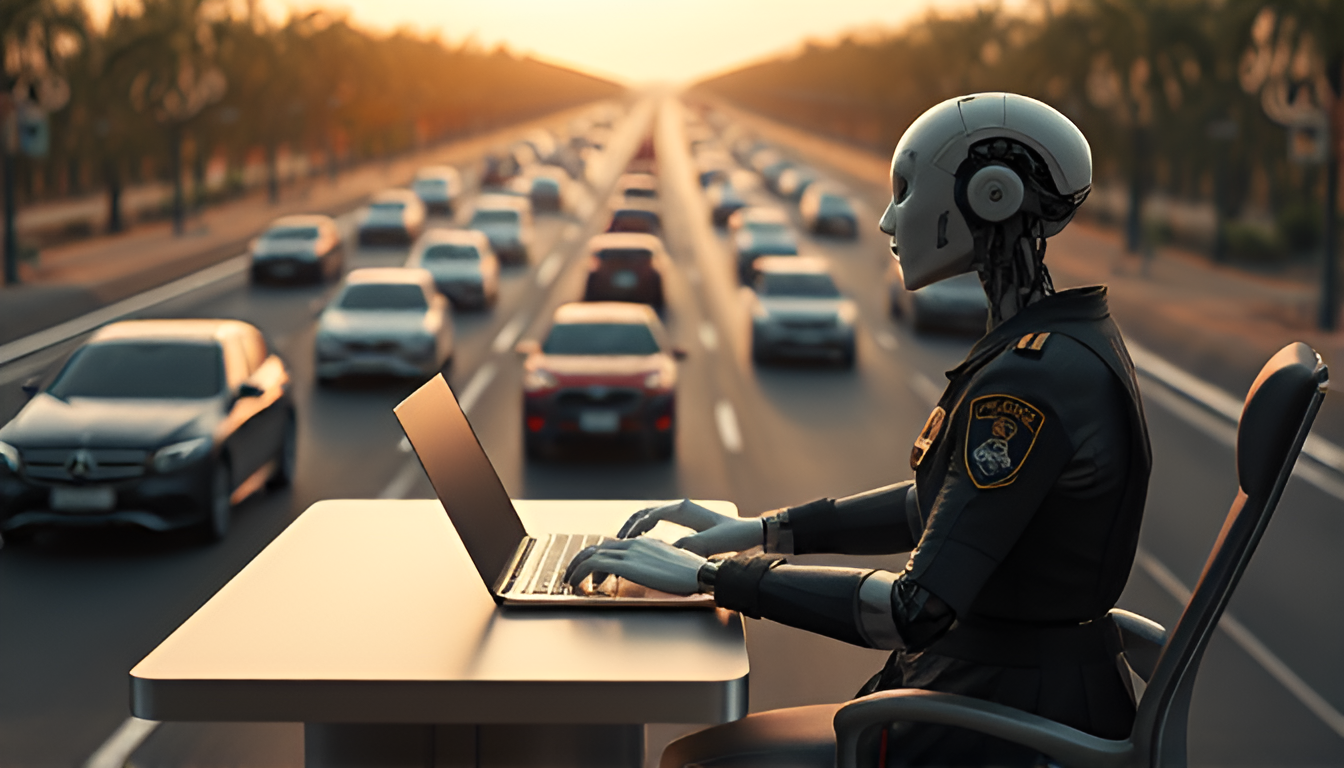

# Steps in Detecting Drowsiness with InceptionV3

## 1. Importing Libraries:
Initially, I imported essential libraries such as NumPy, TensorFlow, and others like OS, warnings, Matplotlib, and Pandas. These libraries were crucial for data manipulation, model building, and visualization.

In [1]:
# numpy , os , ..
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt

# tensorflow , keras
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# warning
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Test and Training Data:
I used the `ImageDataGenerator()` function to read both test and training datasets efficiently. This method allowed for real-time data augmentation, improving the model's robustness against diverse images.

In [2]:
img_generator = ImageDataGenerator(
    rescale = 1. / 255 ,   
    zoom_range= 0.2 ,
    shear_range= 0.2)

In [3]:
train_dir = 'Data/train/'

train = img_generator.flow_from_directory(
    train_dir ,
    target_size = (300 , 300) ,
    batch_size = 128 ,
    class_mode = 'binary')

Found 5863 images belonging to 2 classes.


In [4]:
test_dir = 'Data/test/'

test = img_generator.flow_from_directory(
    test_dir ,
    target_size = (300 , 300) ,
    batch_size = 32 ,
    class_mode = 'binary')

Found 1483 images belonging to 2 classes.


## 3. Creating the InceptionV3 Model:
Next, I created the InceptionV3 model using pre-trained ImageNet weights. I customized the final layer for binary classification, enabling the model to discern between drowsy and normal. Afterward, I compiled and fitted the model with the labeled drowsy dataset, optimizing its performance for our specific use case.

In [5]:
pre_trained_model = InceptionV3(
                            input_shape = (300 , 300 , 3) ,
                            include_top = False ,
                            weights = 'imagenet')

In [6]:
for layer in pre_trained_model.layers :
    layer.trainable = False 

In [7]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [8]:
last_layer = pre_trained_model.get_layer('mixed10')
last_layer_output = last_layer.output

In [9]:
new_last_layer = layers.Flatten()(last_layer_output)
new_last_layer = layers.Dense(512 , activation = 'relu')(new_last_layer)
new_last_layer = layers.Dropout(0.6)(new_last_layer)
new_last_layer = layers.Dense(1 , activation = 'sigmoid')(new_last_layer)

In [10]:
model = Model(
    pre_trained_model.input ,
    new_last_layer)

In [11]:
model.compile(
    optimizer = RMSprop(learning_rate = 0.0001) ,
    loss = 'binary_crossentropy' ,
    metrics = ['accuracy'])

In [12]:
history = model.fit(
                    train ,
                    validation_data = test ,
                    epochs = 10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 304s 6s/step - accuracy: 0.7507 - loss: 2.8889 - val_accuracy: 0.9697 - val_loss: 0.0834
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 372s 8s/step - accuracy: 0.8800 - loss: 0.2791 - val_accuracy: 0.9831 - val_loss: 0.0533
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 419s 9s/step - accuracy: 0.9113 - loss: 0.1996 - val_accuracy: 0.9474 - val_loss: 0.1011
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 422s 9s/step - accuracy: 0.9449 - loss: 0.1354 - val_accuracy: 0.8557 - val_loss: 0.3836
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 431s 9s/step - accuracy: 0.9443 - loss: 0.1512 - val_accuracy: 0.9231 - val_loss: 0.1702
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 379s 8s/step - accuracy: 0.9565 - loss: 0.1084 - val_accuracy: 0.9831 - val_loss: 0.0426
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 350s 7s/step - accuracy: 0.9675 - loss: 0.0766 - val_accuracy: 0.9278 - val_loss: 0.1761
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 366s 8s/step - accuracy: 0.9693 - loss: 0.0826 - val_accuracy: 0.9710 - v

In [13]:
history_df = pd.DataFrame(history.history)

## 4. Visualizing Train and Test Loss and Accuracy:
To evaluate the model’s effectiveness, I visualized the training and testing loss and accuracy metrics. This step was vital in understanding the model's learning progression and its predictive capability concerning drowsiness recognition.

In [14]:
def comparetive_plot(line1 , line2 , label , title) :
    
    # first line
    plt.plot(line1 ,
             linewidth = 2 ,
             label = label[0] ,
             color = 'cadetblue')
    
    # second line
    plt.plot(line2 ,
             linewidth = 2 ,
             label = label[1] ,
             color = 'olive')
    
    # Limiting the Y-Axis Values
    plt.ylim(0 , 1.2)
    
    
    # Adding Title , Labels and Legend
    plt.title(title)
    plt.ylabel('Metrics')
    plt.xlabel('Epochs')
    plt.legend()
    
    
    # Displaying the Chart
    plt.show()

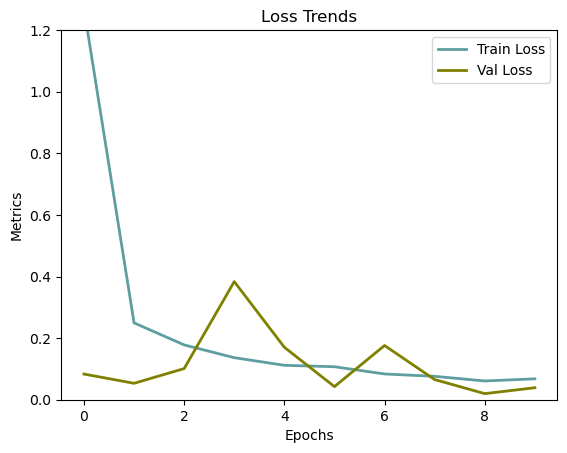

In [15]:
comparetive_plot(history_df['loss'] , 
                history_df['val_loss'] , 
                label = ['Train Loss' , 'Val Loss'] ,
                title = 'Loss Trends')

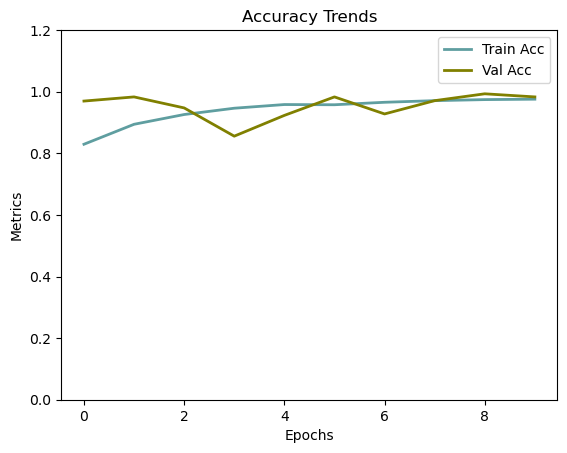

In [16]:
comparetive_plot(history_df['accuracy'] ,
                history_df['val_accuracy'] ,
                label = ['Train Acc' , 'Val Acc'] ,
                title = 'Accuracy Trends')

Completing this project not only addressed a critical safety concern but also opened avenues for further exploration. Other related projects could include employing pre-trained convolutional neural network (CNN) models to develop systems that predict reckless driving behavior through vehicle movement analysis or create intelligent surveillance systems that monitor driver attentiveness in commercial fleets. With the advancement of deep learning technologies, the potential applications in enhancing road safety are vast and promising.

By undertaking this project, I hope to contribute to a future where technology plays a pivotal role in reducing road accidents caused by drowsiness and other hazardous driving behaviors.